<a href="https://colab.research.google.com/github/Kalyan1902/DeepLearning/blob/main/BackPropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from math import exp
from random import seed
from random import random

In [ ]:
# Initialize a neural network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    # Create the hidden layer with random weights
    hidden_layer = [{'weights': [random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    # Create the output layer with random weights
    output_layer = [{'weights': [random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network


In [ ]:
# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights) - 1):
        activation += weights[i] * inputs[i]
    return activation

# Transfer neuron activation using sigmoid function
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))


In [ ]:
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs


In [ ]:
# Calculate the derivative of a neuron output
def transfer_derivative(output):
    return output * (1.0 - output)


In [ ]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()

        if i != len(network) - 1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(neuron['output'] - expected[j])

        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])


In [ ]:
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']


In [ ]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i] - outputs[i]) ** 2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))


In [ ]:
# Seed for reproducibility
seed(2)

# Define the dataset for training
dataset = [
    [2.7810836, 2.550537003, 0],
    [1.465489372, 2.362125076, 0],
    [3.396561688, 4.400293529, 0],
    [1.38807019, 1.850220317, 0],
    [3.06407232, 3.005305973, 0],
    [7.627531214, 2.759262235, 1],
    [5.332441248, 2.088626775, 1],
    [6.922596716, 1.77106367, 1],
    [8.675418651, -0.242068655, 1],
    [7.673756466, 3.508563011, 1]
]

# Display the input dataset
print("\nThe input Data Set:\n", dataset)

# Get the number of inputs
n_inputs = len(dataset[0]) - 1
print("\nNumber of Inputs:\n", n_inputs)

# Get the number of unique outputs
n_outputs = len(set([row[-1] for row in dataset]))
print("\nNumber of Outputs:\n", n_outputs)

# Initialize the neural network
network = initialize_network(n_inputs, 2, n_outputs)

# Train the network
train_network(network, dataset, 0.5, 20, n_outputs)

# Display the final neural network
print("\nFinal Neural Network:")
i = 1
for layer in network:
    j = 1
    for sub in layer:
        print("\nLayer[%d] Node[%d]:\n" % (i, j), sub)
        j += 1
    i += 1



The input Data Set:
 [[2.7810836, 2.550537003, 0], [1.465489372, 2.362125076, 0], [3.396561688, 4.400293529, 0], [1.38807019, 1.850220317, 0], [3.06407232, 3.005305973, 0], [7.627531214, 2.759262235, 1], [5.332441248, 2.088626775, 1], [6.922596716, 1.77106367, 1], [8.675418651, -0.242068655, 1], [7.673756466, 3.508563011, 1]]

Number of Inputs:
 2

Number of Outputs:
 2
>epoch=0, lrate=0.500, error=7.317
>epoch=1, lrate=0.500, error=8.334
>epoch=2, lrate=0.500, error=8.867
>epoch=3, lrate=0.500, error=9.162
>epoch=4, lrate=0.500, error=9.341
>epoch=5, lrate=0.500, error=9.460
>epoch=6, lrate=0.500, error=9.544
>epoch=7, lrate=0.500, error=9.606
>epoch=8, lrate=0.500, error=9.654
>epoch=9, lrate=0.500, error=9.691
>epoch=10, lrate=0.500, error=9.722
>epoch=11, lrate=0.500, error=9.747
>epoch=12, lrate=0.500, error=9.768
>epoch=13, lrate=0.500, error=9.786
>epoch=14, lrate=0.500, error=9.801
>epoch=15, lrate=0.500, error=9.814
>epoch=16, lrate=0.500, error=9.826
>epoch=17, lrate=0.500, 

>epoch=0, lrate=0.500, error=9.861
>epoch=1, lrate=0.500, error=9.868
>epoch=2, lrate=0.500, error=9.874
>epoch=3, lrate=0.500, error=9.879
>epoch=4, lrate=0.500, error=9.884
>epoch=5, lrate=0.500, error=9.889
>epoch=6, lrate=0.500, error=9.893
>epoch=7, lrate=0.500, error=9.897
>epoch=8, lrate=0.500, error=9.901
>epoch=9, lrate=0.500, error=9.905
>epoch=10, lrate=0.500, error=9.908
>epoch=11, lrate=0.500, error=9.911
>epoch=12, lrate=0.500, error=9.914
>epoch=13, lrate=0.500, error=9.916
>epoch=14, lrate=0.500, error=9.919
>epoch=15, lrate=0.500, error=9.921
>epoch=16, lrate=0.500, error=9.923
>epoch=17, lrate=0.500, error=9.926
>epoch=18, lrate=0.500, error=9.928
>epoch=19, lrate=0.500, error=9.929


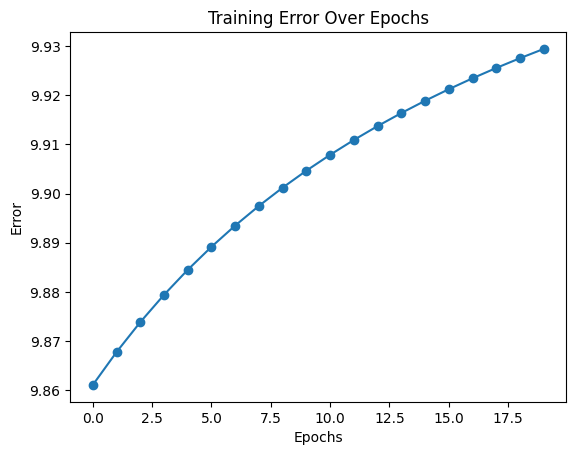

In [ ]:
import matplotlib.pyplot as plt
from math import exp
from random import seed
from random import random

# ... (previous code remains unchanged)

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    errors = []  # Store training errors for plotting

    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i] - outputs[i]) ** 2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        errors.append(sum_error)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

    # Plotting the training errors
    plt.plot(range(n_epoch), errors, marker='o')
    plt.title('Training Error Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.show()

# ... (rest of the code remains unchanged)

# Train the network and plot the training errors
train_network(network, dataset, 0.5, 20, n_outputs)
